# Leaf Disease Detection with Enhanced Exploratory Data Analysis (EDA)

## ADS - 599 Capstone Project
### Team 2

*   Kaustav Ghosh Dastiar
*   Muris Saab
*   Nishok Narayanan





In [12]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
import warnings
from tensorflow.keras.utils import load_img, img_to_array
warnings.filterwarnings("ignore")

# Set default plot style
plt.style.use('ggplot')


In [13]:
# Define the dataset paths (update as necessary)
train_dir = '/Users/kaustavghoshdastidar/Documents/My_World/My_Study_Program/Masters/Research_Paper-Assignments/ADS-599_Final_Capstone_Project/plant_leaf_diesease_detection/dataset/train' #'/kaggle/input/leaf-disease-detection-dataset/dataset/train'
test_dir = '/Users/kaustavghoshdastidar/Documents/My_World/My_Study_Program/Masters/Research_Paper-Assignments/ADS-599_Final_Capstone_Project/plant_leaf_diesease_detection/dataset/test' #'/kaggle/input/leaf-disease-detection-dataset/dataset/test'


# Function to load data from directories and create DataFrames
def load_data(directory):
    filepaths, labels = [], []
    class_list = sorted(os.listdir(directory))
    for klass in class_list:
        classpath = os.path.join(directory, klass)

        # Skip files that are not directories
        if not os.path.isdir(classpath):
            continue
        
        parts = klass.split('__')
        label = parts[1] if len(parts) > 1 else 'Unknown'
        
        file_list = os.listdir(classpath)
        for file in file_list:
            filepaths.append(os.path.join(classpath, file))
            labels.append(label)

    return pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Load training and testing datasets
train_df = load_data(train_dir) if os.path.exists(train_dir) else pd.DataFrame()
test_df = load_data(test_dir) if os.path.exists(test_dir) else pd.DataFrame()

# Display basic info about the datasets
print(f"Training Data: {train_df.shape[0]} samples, {train_df['labels'].nunique()} classes")
print(f"Testing Data: {test_df.shape[0]} samples, {test_df['labels'].nunique()} classes")

Training Data: 70295 samples, 21 classes
Testing Data: 17572 samples, 21 classes


In [14]:
# get the number of classes and the images count for each class in train_df
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
# lets get the average height and width of a sample of the train images
ht=0
wt=0
# select 100 random samples of train_df
train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

The number of classes in the dataset is:  21
            CLASS               IMAGE COUNT 
         _Apple_scab               2016     
       _Bacterial_spot             5453     
          _Black_rot               3875     
      _Cedar_apple_rust            1760     
_Cercospora_leaf_spot Gray_leaf_spot     1642     
        _Common_rust_              1907     
        _Early_blight              3859     
    _Esca_(Black_Measles)          1920     
_Haunglongbing_(Citrus_greening)     2010     
         _Late_blight              3790     
          _Leaf_Mold               1882     
_Leaf_blight_(Isariopsis_Leaf_Spot)     1722     
         _Leaf_scorch              1774     
    _Northern_Leaf_Blight          1908     
       _Powdery_mildew             3419     
     _Septoria_leaf_spot           1745     
_Spider_mites Two-spotted_spider_mite     1741     
         _Target_Spot              1827     
_Tomato_Yellow_Leaf_Curl_Virus     1961     
     _Tomato_mosaic_virus          

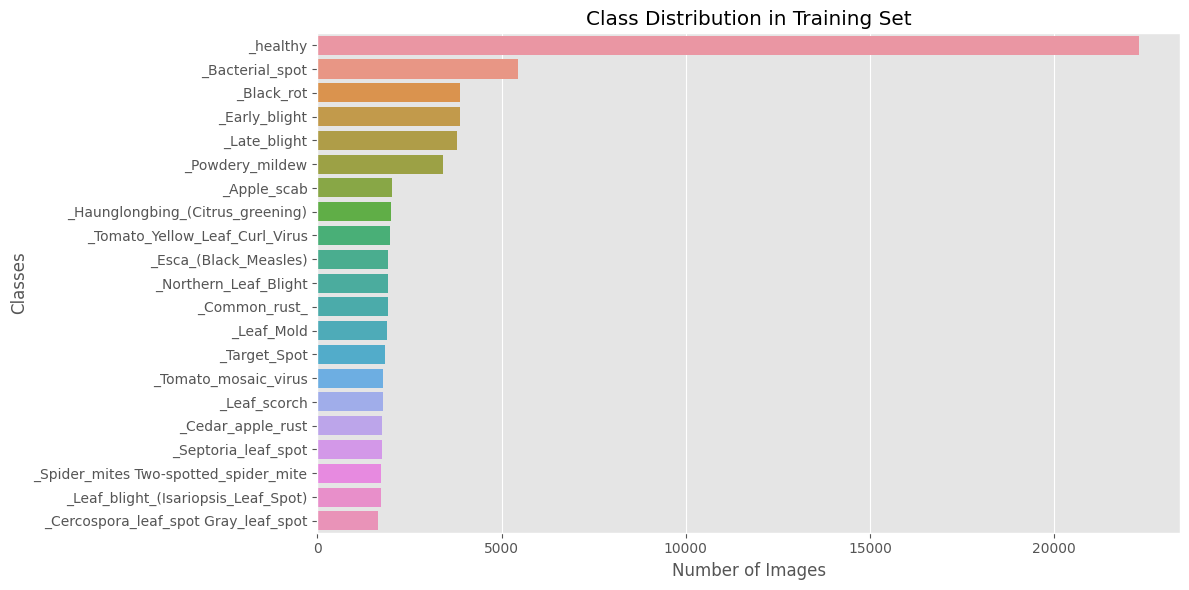

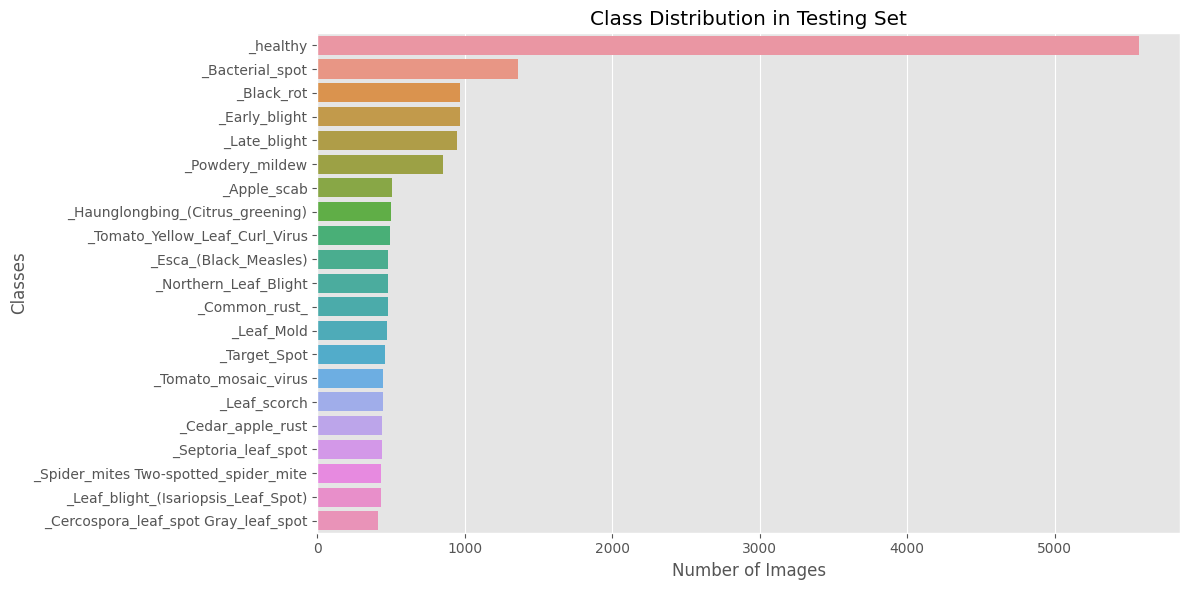

In [15]:

# Visualize class distribution in training set
if not train_df.empty:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=train_df['labels'], order=train_df['labels'].value_counts().index)
    plt.title('Class Distribution in Training Set')
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.tight_layout()
    plt.show()

# Visualize class distribution in testing set
if not test_df.empty:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=test_df['labels'], order=test_df['labels'].value_counts().index)
    plt.title('Class Distribution in Testing Set')
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.tight_layout()
    plt.show()


In [ ]:
# Display sample images from training data
def show_sample_images(df, n_samples=5):
    sample_df = df.sample(n_samples)
    plt.figure(figsize=(15, 8))
    for i, (file_path, label) in enumerate(zip(sample_df['filepaths'], sample_df['labels'])):
        img = load_img(file_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0

        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img_array)
        plt.title(label, color='blue')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Check if the dataframe is not empty before showing images
if not train_df.empty:
    show_sample_images(train_df, n_samples=5)


In [17]:

# Analyze image dimensions in the training set
img_dimensions = []

for img_path in train_df['filepaths'].sample(100):  # Analyzing a sample of 100 images for performance reasons
    img = image.load_img(img_path)
    img_dimensions.append(img.size)

img_dimensions = np.array(img_dimensions)

# Plotting the distribution of image dimensions
plt.figure(figsize=(10, 6))
plt.scatter(img_dimensions[:, 0], img_dimensions[:, 1], alpha=0.5)
plt.title('Distribution of Image Dimensions in Training Set')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'